In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os


# Part 1: Method-ML Algorithams

More Deatils :
https://www.dataquest.io/blog/top-10-machine-learning-algorithms-for-beginners/

https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

In [2]:
#ML Librarires 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import seaborn as sns
import missingno as msno
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

# Data Read

In [3]:
df = pd.read_csv('../input/star-type-classification/Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
df.shape

(240, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
df=df.sample(frac=1).reset_index(drop=True)

Background: The idiomatic way to do this with Pandas is to use the .sample method of your dataframe to sample all rows without replacement https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

If you wish to shuffle your dataframe in-place and reset the index, you could do e.g.

df = df.sample(frac=1).reset_index(drop=True)

Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.

# Exploratory Data Analysis & Data Pre-Processing

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

In [8]:
pd.DataFrame(df.isnull().sum(), columns=["Null Count"])

,Null Count
Temperature,0
L,0
R,0
A_M,0
Color,0
Spectral_Class,0
Type,0


In [9]:
#Or 
#missing values cheacking
df.apply(lambda x: sum(x.isnull()),axis=0)

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [10]:
from sklearn import preprocessing

In [11]:
#Label Encoding

le = preprocessing.LabelEncoder()

# columns to select for encoding
selected_col = ['Color','Spectral_Class']

le.fit(df[selected_col].values.flatten())

df[selected_col] = df[selected_col].apply(le.fit_transform)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    int64  
 5   Spectral_Class  240 non-null    int64  
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


In [13]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3752,209000.000000,955.00000,-11.24,8,5,5
1,3180,0.001000,0.35000,11.76,8,5,1
2,2968,0.000461,0.11900,17.45,8,5,0
3,12984,0.000880,0.00996,11.23,1,1,2
4,6757,1.430000,1.12000,2.41,15,2,3


<AxesSubplot:>

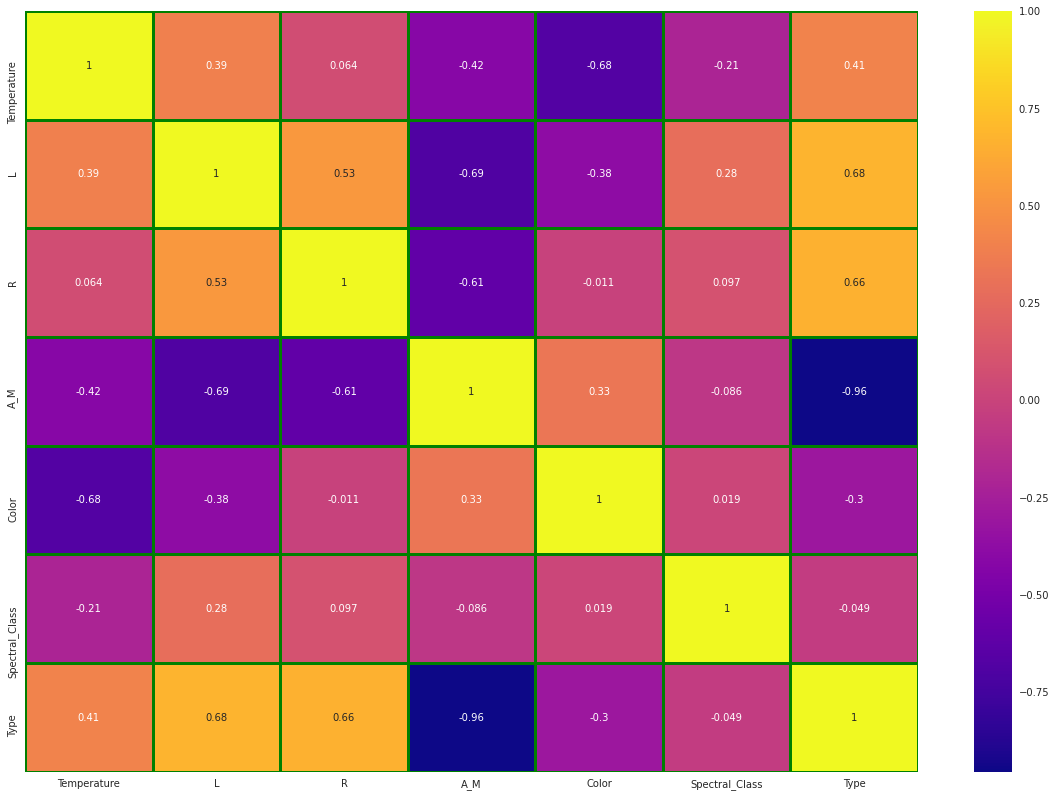

In [14]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')
#Data Cor-Relation

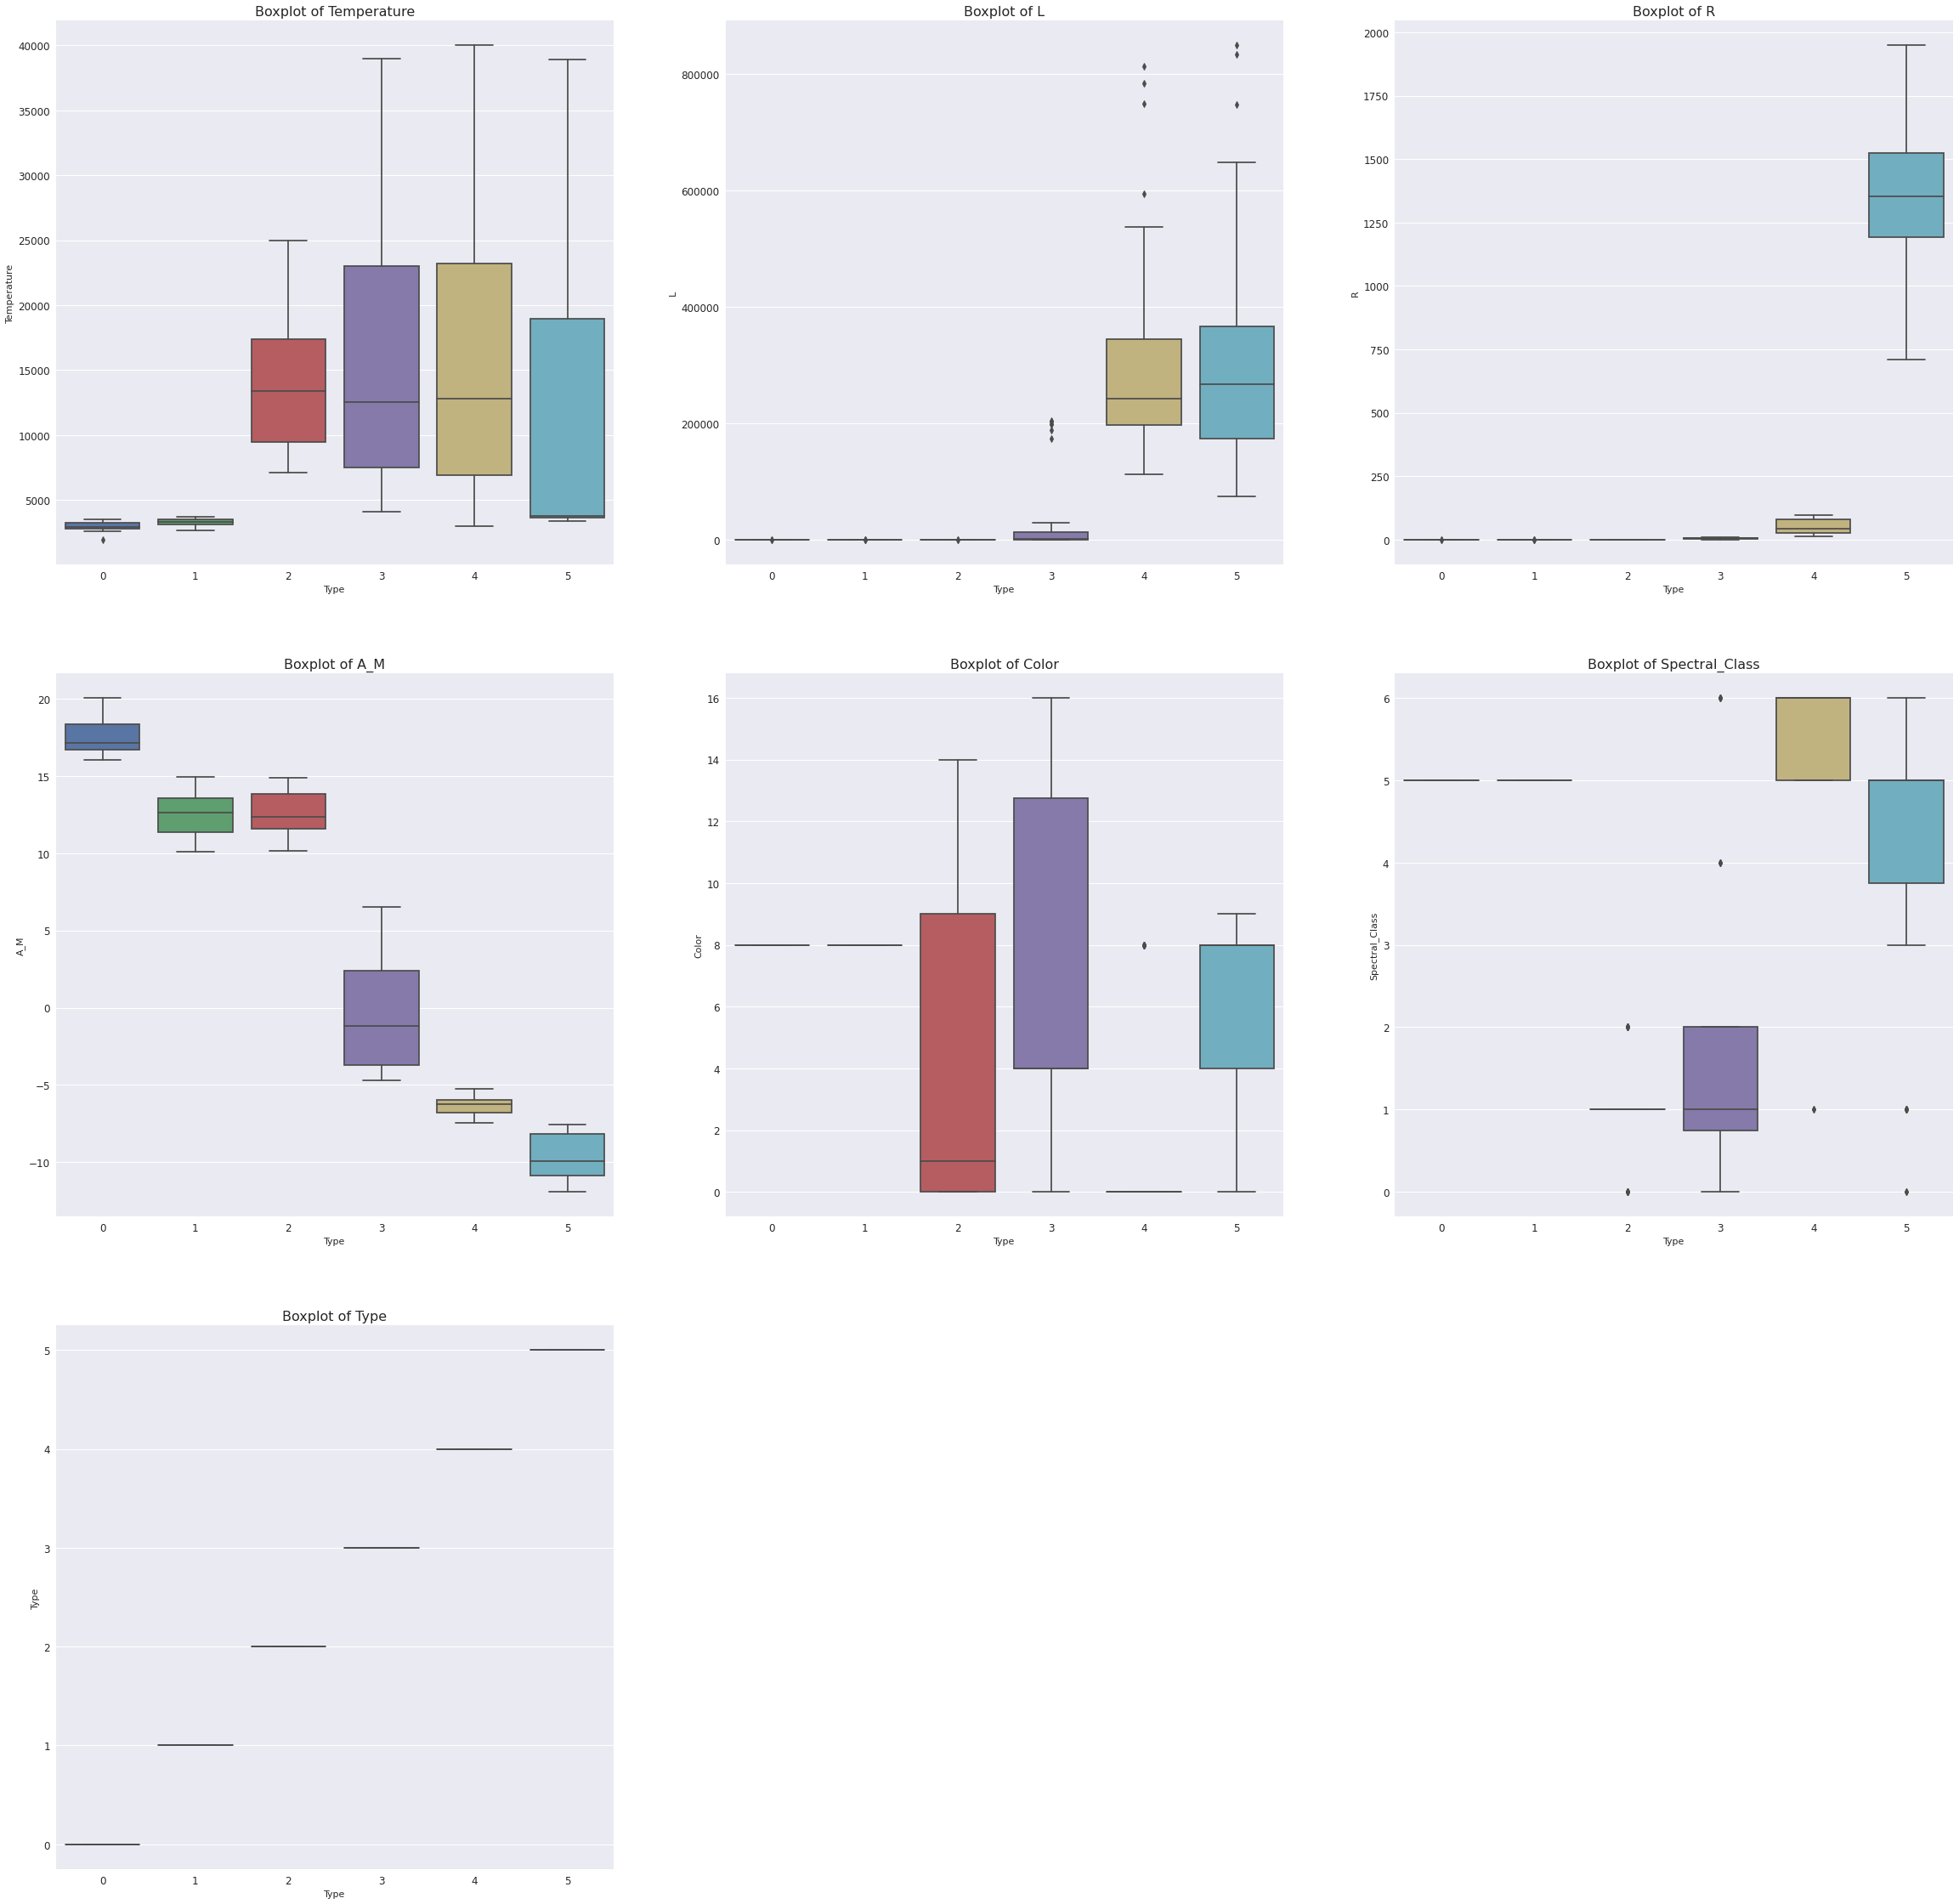

In [15]:
#Box Plotting All features distribution corresponding Target column
i=1
plt.figure(figsize=(40,40))
for c in df.columns[:]:
    plt.subplot(3,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Type'])
    i+=1
plt.show()

#Skewness of Data

In [16]:
# the data columns
cols = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']
target = ["Type"]

In [17]:
import scipy.stats as stats
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

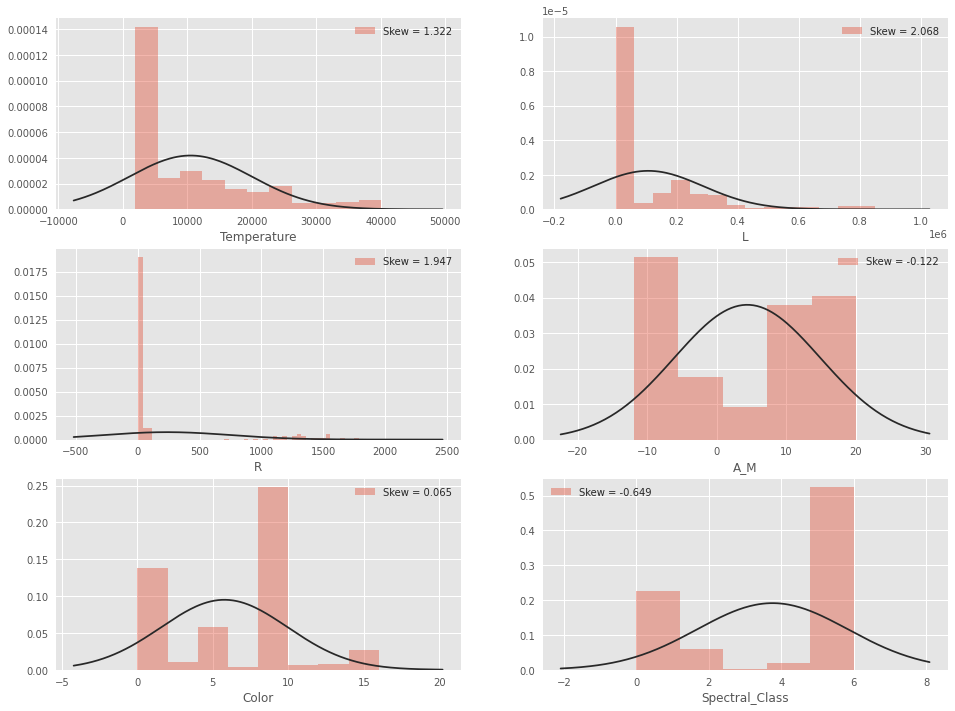

In [18]:
fig,ax = plt.subplots(3,2, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

None of the features are normally distributed and some have outliers

Note: Outlier treatment maybe done to check impact on classification

Deatils: https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/

In [19]:
#checking the target variable countplot

print("class :", df["Type"].unique())
print()

print("Value Count :\n",df["Type"].value_counts())

class : [5 1 0 2 3 4]

Value Count :
 0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64


In [20]:
len(df["Type"].value_counts())

6

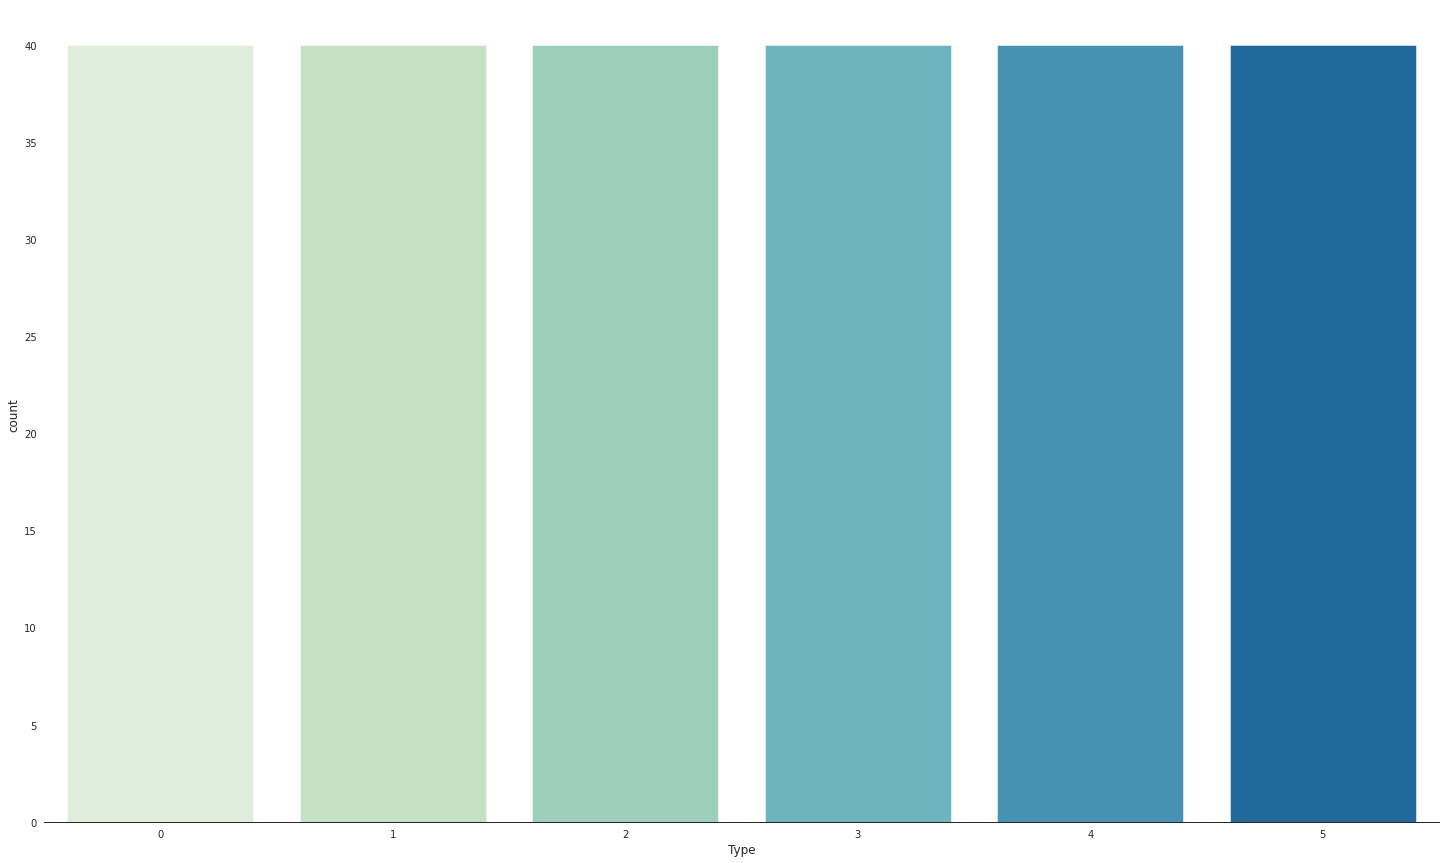

In [21]:
#checking the target variable countplot

plt.figure(figsize=(25,15))
sns.set_style('white')
sns.countplot(x='Type', data = df, palette='GnBu')
sns.despine(left=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


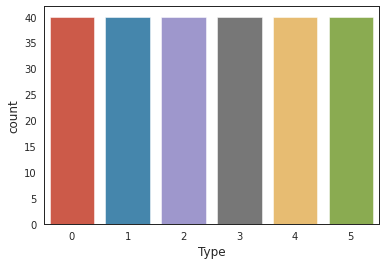

In [22]:
sns.countplot(df["Type"])
plt.show()

Univariate Box Plot

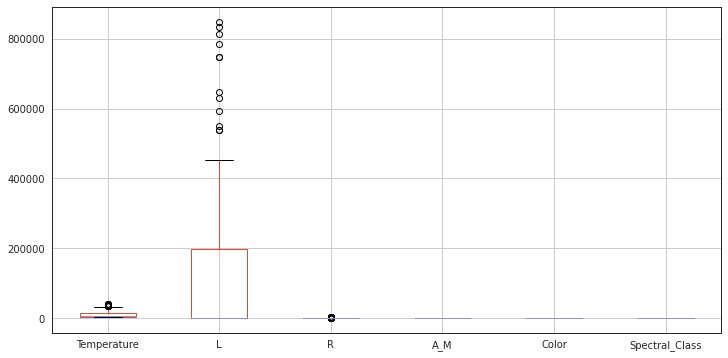

In [23]:
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

Observations:¶
- L is the main component of Df making more than 70% of composition
- Combined temp and L make up around 90%
- A_M, Color, R, spectral  are the least important components

Above box plot confirms the outliers

I prefer to use models without outlier treatment, in many cases it can improve the model performance.
But it also leads to change of information which might alter real/practical situations

Bivariate Box plots

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

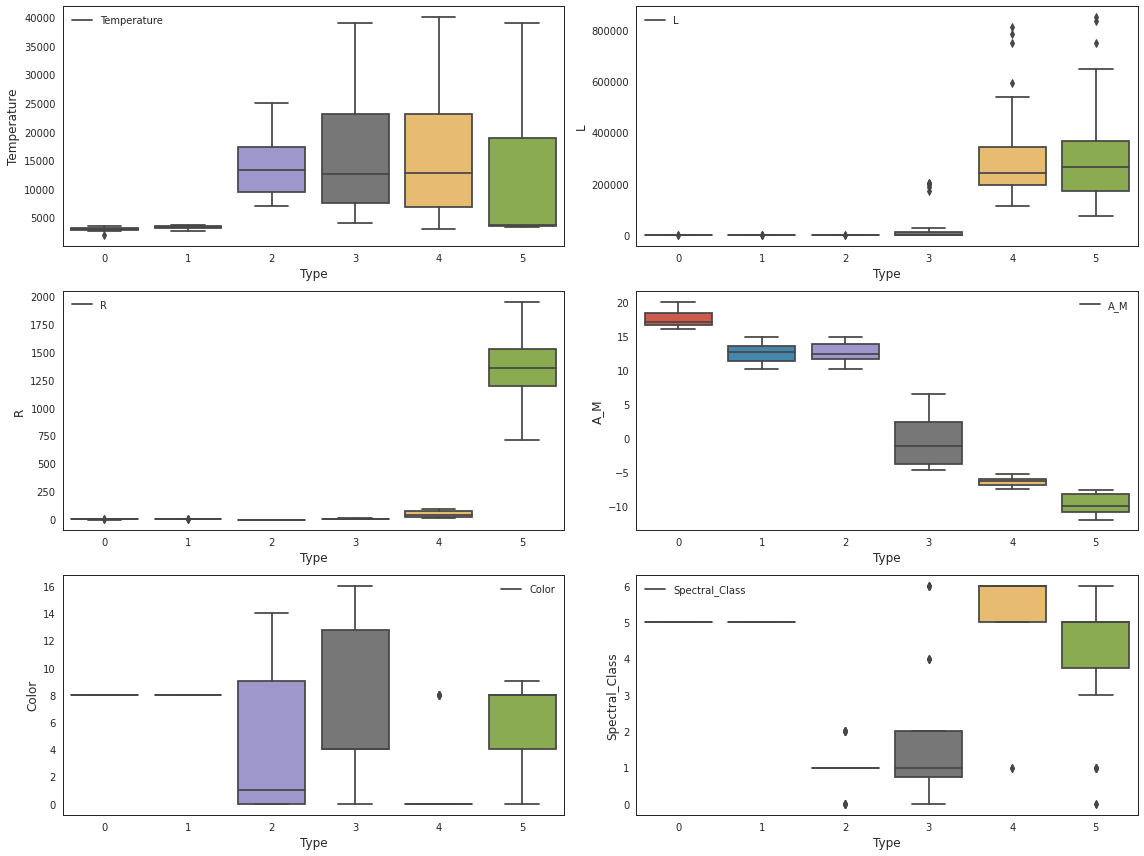

In [24]:
fig,ax = plt.subplots(3,2, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    sns.boxplot("Type", col, ax = ax[i], data=df)
    ax[i].legend([col], loc='best')
    i += 1
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


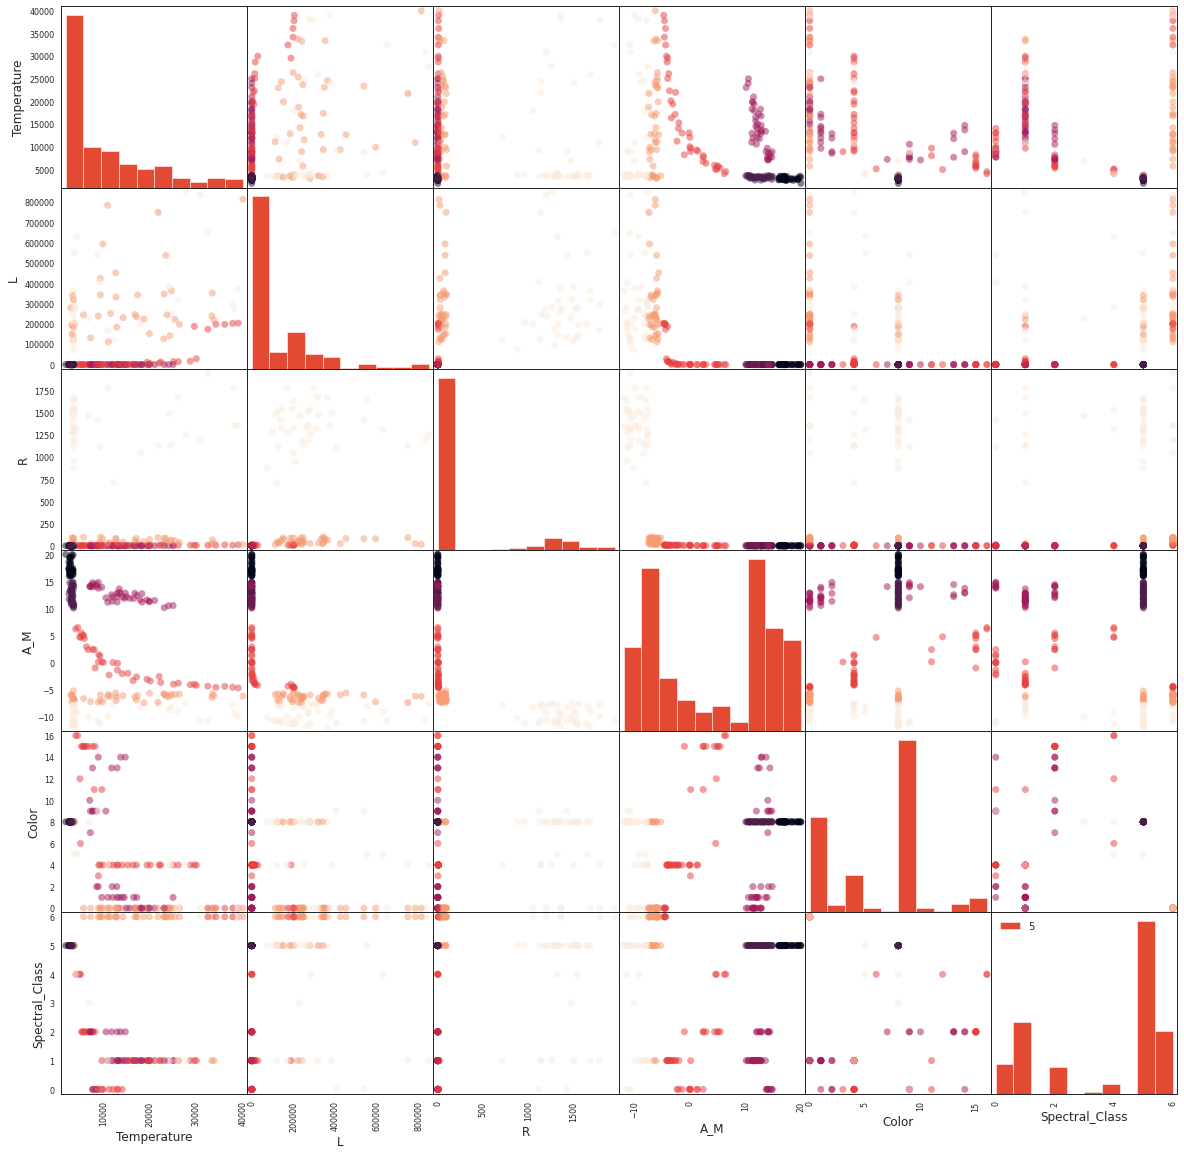

In [25]:
#Scatter Matrix
pd.plotting.scatter_matrix(df.iloc[:,:-1], c=df.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(df["Type"].unique())
plt.show()

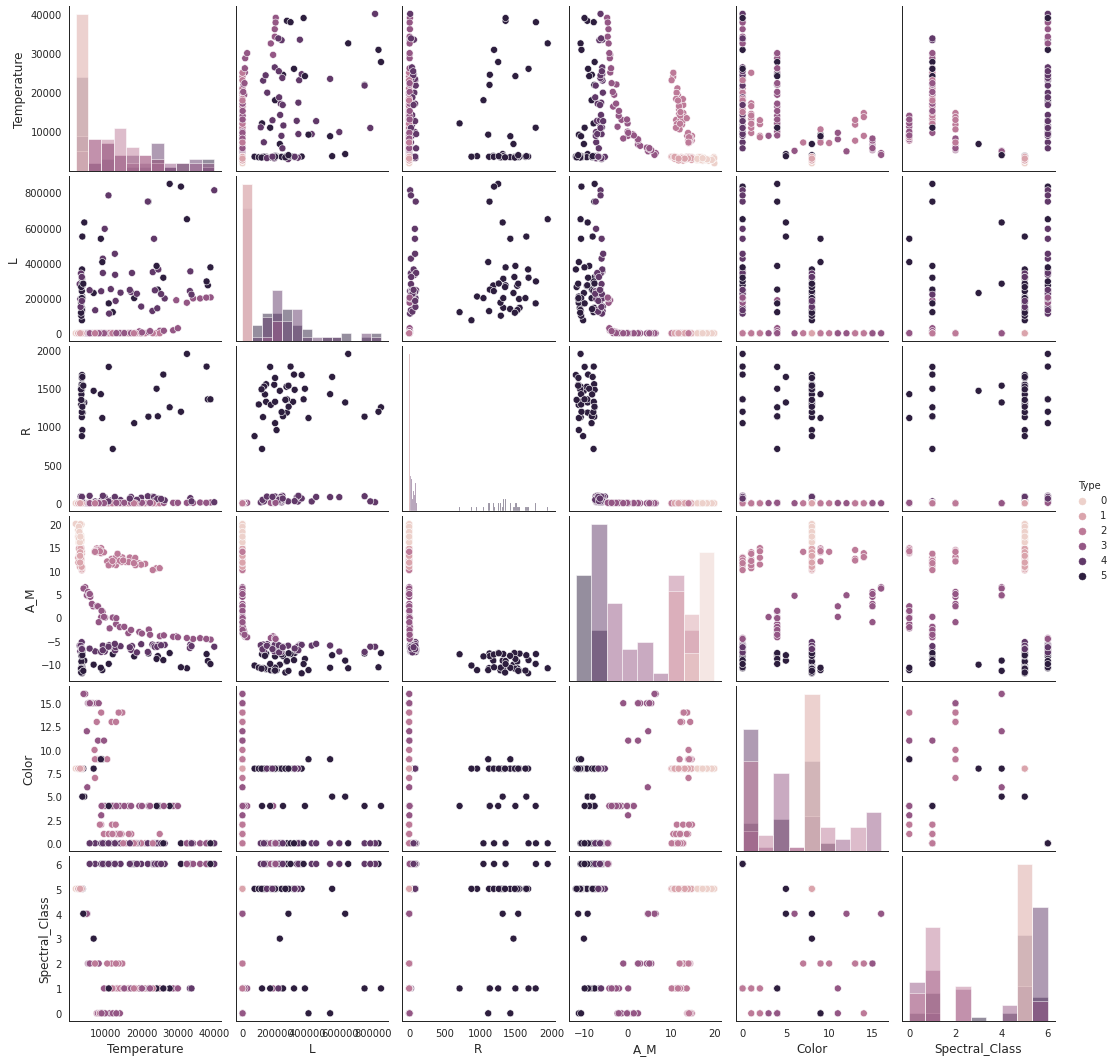

In [26]:
#Pairplot
sns.pairplot(df, hue='Type', diag_kind='hist')
plt.show()

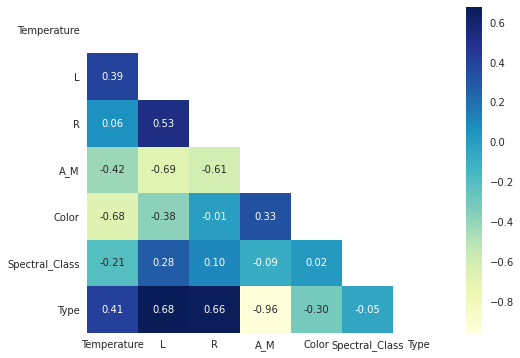

In [27]:
#Correlation Plot
plt.figure(figsize=(8,6))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt= '.2f', cmap='YlGnBu', mask=mask)
plt.show()

In [28]:
#A_M,Color and Spectral have no correlation with Type, 
#which means for some type it maybe high for some low causing cancelling effect

In [29]:
df.groupby("Type")["Color"].mean()

Type
0    8.000
1    8.000
2    4.025
3    6.875
4    1.800
5    5.900
Name: Color, dtype: float64

In [30]:
df.groupby("Type")["R"].mean()

Type
0       0.110015
1       0.348145
2       0.010728
3       4.430300
4      51.150000
5    1366.897500
Name: R, dtype: float64

Statistical Importance Check for Variable

In [31]:
import statsmodels.api as sm
import statsmodels.stats as sms

for col in cols:
    data = sm.formula.ols(col+"~ Type", data=df).fit()
    pval = sms.anova.anova_lm(data)["PR(>F)"][0]
    print(f"Pval for {col}: {pval}")

Pval for Temperature: 3.323401956092008e-11
Pval for L: 1.641155523850019e-33
Pval for R: 1.6272694239286276e-31
Pval for A_M: 6.33087509199859e-128
Pval for Color: 1.4684325869921742e-06
Pval for Spectral_Class: 0.44868186785826514


Data Preprocessing & Evaluation Functions

In [32]:
seed = 42

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier,\
                            BaggingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

In [33]:
# split the data into train and test
def split_data(X, Y, seed=42, train_size=0.8):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=train_size, random_state = seed, stratify=Y)
    xtrain, xtest = preprocess(xtrain, xtest)
    return (xtrain, xtest, ytrain, ytest)

# preprocess the data for training
def preprocess(x1, x2=None):
    sc = StandardScaler()
    x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
    if x2 is not None:
        x2 = pd.DataFrame(sc.transform(x2), columns=x2.columns)
        return (x1,x2)
    return x1

# for model evaluation and training
def eval_model(model, X, Y, seed=1):
    xtrain, xtest, ytrain, ytest = split_data(X, Y)
    model.fit(xtrain, ytrain)
    
    trainpred = model.predict(xtrain)
    trainpred_prob = model.predict_proba(xtrain)
    testpred = model.predict(xtest)
    testpred_prob = model.predict_proba(xtest)
    
    print("Train ROC AUC : %.4f"%roc_auc_score(ytrain, trainpred_prob, multi_class='ovr'))
    print("\nTrain classification report\n",classification_report(ytrain, trainpred))
    
    ### make a bar chart for displaying the wrong classification of one class coming in which other class
    
    print("\nTest ROC AUC : %.4f"%roc_auc_score(ytest, testpred_prob, multi_class='ovr'))
    print("\nTest classification report\n",classification_report(ytest, testpred))
    
def plot_importance(columns, importance):
    plt.bar(columns, importance)
    plt.show()

In [34]:
#Feature Extraction, Importance & Splitting

Y= df['Type']

X = df.drop(['Type'],axis = 1)

In [35]:
X_sc = preprocess(X)

Creating array of models

In [36]:
model_logr = LogisticRegression(random_state=seed,n_jobs=-1)
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier(random_state=seed)
model_dt_bag = BaggingClassifier(model_dt, random_state=seed, n_jobs=-1)
model_ada = AdaBoostClassifier(random_state=seed)
model_gbc = GradientBoostingClassifier(random_state=seed)
model_rf = RandomForestClassifier(random_state=seed, n_jobs=-1)
model_xgb = XGBClassifier(random_state=seed)
model_lgbm = LGBMClassifier(random_state=seed, n_jobs=-1)
model_knn = KNeighborsClassifier(n_jobs=-1)


In [37]:
models = []
models.append(('LR',model_logr))
models.append(('NB',model_nb))
models.append(('DT',model_dt))
models.append(('Bag',model_dt_bag))
models.append(('Ada',model_ada))
models.append(('GBC',model_gbc))
models.append(('RF',model_rf))
models.append(('XGB',model_xgb))
models.append(('LGBM',model_lgbm))
models.append(('KNN',model_knn))

Running the algorithms

In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X_sc, Y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    accuracy = scores.mean()
    std = scores.std()
    print(f"{name} : Mean ROC {accuracy} STD:({std})")
    results.append(scores)
    names.append(name)

LR : Mean ROC 0.9664091192032369 STD:(0.0214225403052214)
NB : Mean ROC 0.9787675070028012 STD:(0.023492300999750942)
DT : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
Bag : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
Ada : Mean ROC 0.5833333333333334 STD:(0.0)
GBC : Mean ROC 0.983168378462496 STD:(0.015811533343763857)
RF : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
XGB : Mean ROC 1.0 STD:(0.0)
LGBM : Mean ROC 0.9749019607843138 STD:(0.02049246320759788)
KNN : Mean ROC 0.9706356987239341 STD:(0.01679566161186135)


Comparison of Models

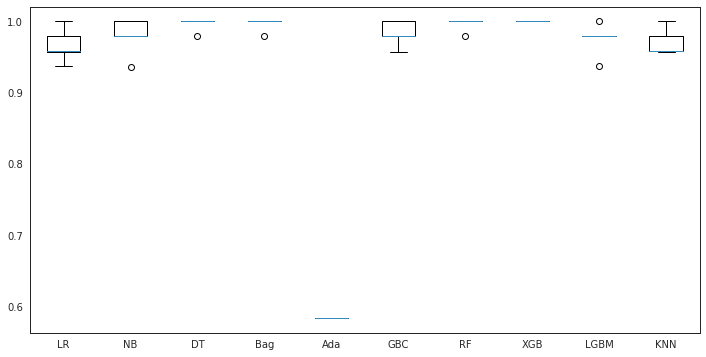

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Only Significant Variables

In [40]:
X = df.drop(['A_M', 'Color', 'Spectral_Class'], axis=1)
X_sc = preprocess(X)
Y = df['Type']

In [41]:
results = []
names = []

for name, model in models:
    scores = cross_val_score(model, X_sc, Y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    accuracy = scores.mean()
    std = scores.std()
    print(f"{name} : Mean ROC {accuracy} STD:({std})")
    results.append(scores)
    names.append(name)

LR : Mean ROC 0.9791176470588236 STD:(0.013176217706879299)
NB : Mean ROC 1.0 STD:(0.0)
DT : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
Bag : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
Ada : Mean ROC 0.5833333333333334 STD:(0.0)
GBC : Mean ROC 1.0 STD:(0.0)
RF : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
XGB : Mean ROC 0.9958169934640523 STD:(0.008366013071895394)
LGBM : Mean ROC 1.0 STD:(0.0)
KNN : Mean ROC 0.9873513849984438 STD:(0.016906593104650706)


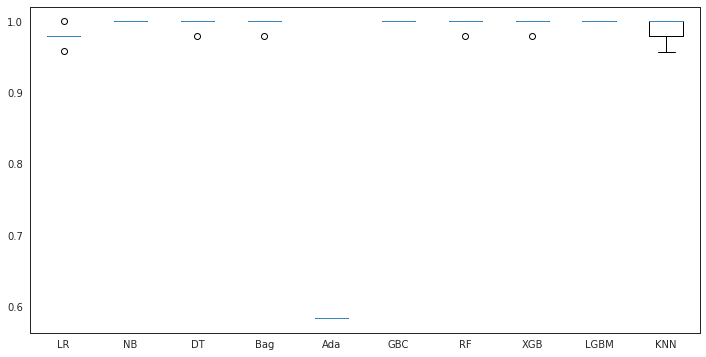

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(results)
ax.set_xticklabels(names)
plt.show()